In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Setting plot style
plt.style.use('ggplot')

# Setting parameters
state_space_encoding = {'11' : 0, '21' : 1, '31' : 2, '41' : 3, '51' : 4, '12' : 5, '22' : 6, '32' : 7, '42' : 8, '52' : 9, '33': 10, '43': 11, '34': 12, '44': 13}
action_space = {0: "up", 1: "right", 2: "down", 3: "left"}
MAX_STEPS = 50
epsilon = 0.99
min_epsilon = 0.3
greedy_epsilon = 0.3
gamma = 0.9999
max_episodes = 10000

# Defining some functions
def loc_to_enc(loc):
  return state_space_encoding[str(loc[0]) + str(loc[1])]


# Defining Main Class
class WarehouseAgent:

  """
  The Warehouse Agent Environment
  Inspired from Sokoban

  The game is played on a board of squares, where each square is a floor or a wall. Some floor squares
  contain boxes, and some floor squares are marked as storage locations. The task is to make the
  warehouse agent push the box to reach its intended destination.
  The warehouse agent is confined to the board and may move horizontally or vertically onto empty
  squares (never through walls or boxes). The agent can move a box by walking up to it and pushing it to
  the square beyond. Boxes cannot be pulled, and they cannot be pushed to squares with walls or other
  boxes. The number of boxes equals the number of storage locations. The puzzle is solved when all boxes
  are placed at storage locations.

  Dimension: The grid world has a dimension of size 6 x 7
  
  State Space: Each row-column cell in the grid denotes the state of that cell
  [For eg, the agent in the image is located at row no. 2 and col no. 3 which translates to state (1,2)]
  
  Action Space: The agent can move in four directions: UP, DOWN, LEFT, RIGHT. It can only push boxes
  forward and can’t move them in any other direction. If the agent pushes the box to the edge of the wall,
  then it can not push the box out of it - certain actions are irreversible
  
  Reward: Agent gets a reward of -1 when the box is not at the storage location. The agent receives a
  reward of 0 when the box is at the goal location.
  
  Terminating conditions: If either the box reaches the goal location or it gets stuck at a place where it
  cannot get out.
  
  """

  def __init__(self):
    """
    Initializing the environment
    """
    # setting grid dimensions
    self.GRID_DIM = [6,7]
    
    # setting wall locations
    self.walls = [[i,0] for i in range(4)] + [[0,i] for i in range(1,7)] 
    self.walls += [[3,1], [3,2], [4,2], [5,2], [5,3], [5,4], [5,5], [4,5], [3,5], [3,6], [2,6], [1,6]]

    # setting initial state                  #### SET INITIAL STATE HERE ####
    self.agent_position = np.asarray([1,2])
    self.box_location = np.asarray([4,3])
    self.goal_location = np.asarray([3,1])

    self.obs = np.asarray([loc_to_enc(self.agent_position.tolist()), loc_to_enc(self.box_location.tolist())])


  def step(self, action = "up"):
    """
    Function to control and evaluate the agents' action
    
    Args:
      action: pass on the action which the agent needs to take at that time step
    Returns:
      new_state: the new state agent reaches after taking the action
      reward: the reward obtained on taking the action
      done: boolean value to determine if episode terminating condition is reached
    """

    if action == "up":

      # get above location coordinates (2)
      up_loc = (self.agent_position - np.asarray([1, 0])).tolist()
      up_loc_2 = (up_loc - np.asarray([1, 0])).tolist()
      
      # if there are walls above or there is a box beyond which is a wall, do not move
      if (up_loc[::-1] in self.walls) or (up_loc_2[::-1] in self.walls and up_loc == self.box_location.tolist()):
        return self.obs, -1.0, 0, None

      # if there are no walls, or if the box can be pushed, update the locations
      else:
        if up_loc == self.box_location.tolist():
          self.agent_position = np.asarray(up_loc)
          self.box_location = np.asarray(up_loc_2)
        else:
          self.agent_position = np.asarray(up_loc)
    
    if action == "down":

      # get below location coordinates (2)  
      down_loc = (self.agent_position + np.asarray([1, 0])).tolist()
      down_loc_2 = (down_loc + np.asarray([1, 0])).tolist()
      
      # if there are walls below or there is a box beyond which is a wall, do not move
      if (down_loc[::-1] in self.walls) or (down_loc_2[::-1] in self.walls and down_loc == self.box_location.tolist()):
        return self.obs, -1.0, 0, None

      # if there are no walls, or if the box can be pushed, update the locations
      else:
        if down_loc == self.box_location.tolist():
          self.agent_position = np.asarray(down_loc)
          self.box_location = np.asarray(down_loc_2)
        else:
          self.agent_position = np.asarray(down_loc)

    if action == "left":

      # get location coordinates to the left (2)
      left_loc = (self.agent_position - np.asarray([0, 1])).tolist()
      left_loc_2 = (left_loc - np.asarray([0, 1])).tolist()
      
      # if there are walls below or there is a box beyond which is a wall, do not move
      if (left_loc[::-1] in self.walls) or (left_loc_2[::-1] in self.walls and left_loc == self.box_location.tolist()):
        return self.obs, -1.0, 0, None

      # if there are no walls, or if the box can be pushed, update the locations
      else:
        if left_loc == self.box_location.tolist():
          self.agent_position = np.asarray(left_loc)
          self.box_location = np.asarray(left_loc_2)
        else:
          self.agent_position = np.asarray(left_loc)

    if action == "right":

      # get location coordinates to the right (2)
      right_loc = (self.agent_position + np.asarray([0, 1])).tolist()
      right_loc_2 = (right_loc + np.asarray([0, 1])).tolist()
      
      # if there are walls below or there is a box beyond which is a wall, do not move
      if (right_loc[::-1] in self.walls) or (right_loc_2[::-1] in self.walls and right_loc == self.box_location.tolist()):
        return self.obs, -1.0, 0, None

      # if there are no walls, or if the box can be pushed, update the locations
      else:
        if right_loc == self.box_location.tolist():
          self.agent_position = np.asarray(right_loc)
          self.box_location = np.asarray(right_loc_2)
        else:
          self.agent_position = np.asarray(right_loc)

    # define state space
    self.obs = np.asarray([loc_to_enc(self.agent_position.tolist()), loc_to_enc(self.box_location.tolist())])

    # check if the box is further movable
    if self.__check_box() == 0:
      return self.obs, -1.0, 0, None
    # check if the box is cornered and cannot be moved
    elif self.__check_box() == -1:
      return self.obs, -1.0, 1, None
    # check if the box reached its goal location
    else:
      return self.obs, 0.0, 1, None


  def __check_box(self):
    """
    Private function to check if the box reached the corner or a goal location
    
    Returns:
      1 if box reached the goal location
      0 if box is still movable
      -1 if box is cornered and cannot be moved
    """

    # if goal reached
    if self.box_location.tolist() == self.goal_location.tolist():
      return 1

    # define a vector that checks for walls in all 4 directions
    occ_vec = [0, 0, 0, 0]
    
    # get the coordinates of the box surroundings
    box_surroundings = self.box_location[::-1] + np.asarray([[0,1], [1,0], [-1, 0], [0, -1]])
    
    # check if the surroundings coincide with the wall, if so, then update the occ_vec vector
    for is_occ, direction in enumerate(box_surroundings.tolist()):
      if any(i == direction for i in self.walls):
        occ_vec[is_occ] = 1

    # if adjacent directions are covered by walls (corners), or if there are more than 2 walls around, return immovable
    if (occ_vec in [[1, 1, 0, 0], [1, 0, 1, 0], [0, 1, 0, 1], [0, 0, 1, 1]]) or np.sum(occ_vec) > 2:
      return -1
    # if box still movable
    else:
      return 0


  def reset(self):
    """
    Function to reset the environment at the end of each episode to its initial state configuration
        
    Returns:
      state: the state of the environment reset to its initial conditions
    """

    # reset agent and box locations
    self.agent_position = np.asarray([1,2])
    self.box_location = np.asarray([4,3])

    # define state space
    self.obs = np.asarray([loc_to_enc(self.agent_position.tolist()), loc_to_enc(self.box_location.tolist())])
    
    return self.obs


  def render(self, show_policy = None):
    """
      Function to get the simulation of the warehouse agent system 
    """

    # define x and y axis
    grid_x_axis = np.linspace(1, 6, 6)
    grid_y_axis = np.linspace(1, 7, 7)
    
    # define figure and plot
    fig = plt.figure(figsize = (9,11))
    ax = plt.gca()

    # agent box and storage (movable)
    agent = plt.Circle((self.agent_position[1] + 0.5, self.agent_position[0] + 0.5), 0.26, color='g', alpha = 0.8)
    box = plt.Rectangle((self.box_location[1] + 0.2, self.box_location[0] + 0.2), 0.6, 0.6, color = "brown", alpha = 0.8)

    # wall/storage (immovable)
    storage = plt.Rectangle((self.goal_location[1] + 0.2, self.goal_location[0] + 0.2), 0.6, 0.6, color = "blue", alpha = 0.15)
    storage_circle = plt.Circle((self.goal_location[1] + 0.5, self.goal_location[0] + 0.5), 0.13, color = "blue", alpha = 0.3)

    for wall in self.walls:
      wall_box = plt.Rectangle((wall[0], wall[1]), 1, 1, color = "black", alpha = 0.85)
      ax.add_patch(wall_box)

    # add all patches
    ax.add_patch(storage)
    ax.add_patch(storage_circle)
    ax.add_patch(agent)
    ax.add_patch(box)

    for state_encoding_key in state_space_encoding.keys():
      if show_policy:
        plt.annotate(show_policy[state_encoding_key], [int(state_encoding_key[1])+0.08, int(state_encoding_key[0])+0.92])
      else:
        plt.annotate(state_space_encoding[state_encoding_key], [int(state_encoding_key[1])+0.08, int(state_encoding_key[0])+0.92])

    # additional plot settings
    plt.xticks(ticks = grid_x_axis, labels = grid_x_axis)
    plt.yticks(ticks = grid_y_axis, labels = grid_y_axis)
    ax.invert_yaxis()
    plt.show()

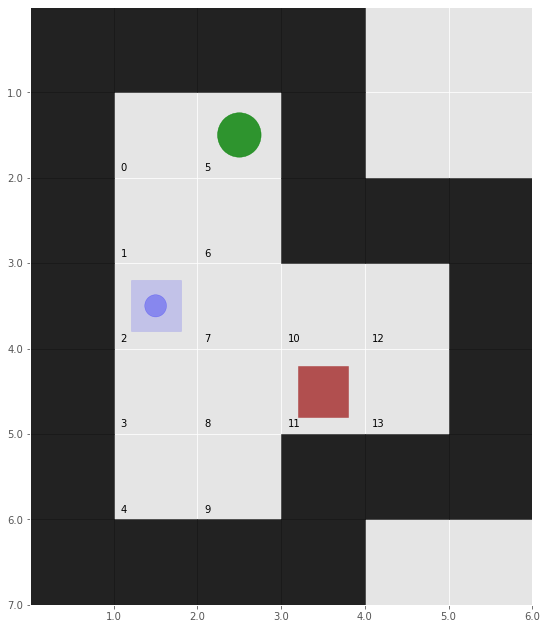

In [2]:
# create a game and try rendering it
game = WarehouseAgent()
game.render()

## On Policy Monte Carlo

In [3]:
# arbitrary initializations
on_policy_mc = np.random.rand(14,14,4)
on_policy_mc = on_policy_mc/np.repeat(a = np.expand_dims(on_policy_mc.sum(axis = 2), axis = 2),repeats = 4, axis = 2)
on_q_mc = np.random.rand(14,14,4)
on_returns_mc = dict()
decaying_epsilon = epsilon
rewards_per_episode = []

for episode in range(max_episodes):
  
  game.reset()
  episode_state_actions = []
  episode_rewards = []
  current_state = game.obs

  decaying_epsilon = max(min_epsilon, decaying_epsilon*0.9999)

  ## generate an episode
  for step in range(MAX_STEPS):

    chosen_action = np.random.choice(4, 1, p = on_policy_mc[game.obs[0], game.obs[1], :])
    next_state, reward, terminated, _ = game.step(action_space[int(chosen_action[0])])

    episode_state_actions.append([current_state.tolist(), chosen_action[0]])
    episode_rewards.append(reward)
    current_state = next_state

    if reward == 0:
      print("Goal Reached!") 
      break
    
    if terminated == 1:
      break

  T = len(episode_rewards)
  rewards_per_episode.append(sum(episode_rewards))
  G = 0.

  for t in range(T - 1, -1, -1):
    G = gamma*G + episode_rewards[t]
    if episode_state_actions[t] not in episode_state_actions[0:t]:
      dict_key = str(episode_state_actions[t][0][0]) + ' ' + str(episode_state_actions[t][0][1]) + ' ' + str(episode_state_actions[t][1])
      if dict_key in on_returns_mc.keys():
        on_returns_mc[dict_key].append(G)
      else:
        on_returns_mc[dict_key] = [G]
      on_q_mc[episode_state_actions[t][0][0],episode_state_actions[t][0][1], episode_state_actions[t][1]] = np.mean(on_returns_mc[dict_key])
      greedy_action = np.argmax(on_q_mc[episode_state_actions[t][0][0],episode_state_actions[t][0][1], :])
      for every_action in range(4):
        if every_action == greedy_action:  
          on_policy_mc[episode_state_actions[t][0][0],episode_state_actions[t][0][1], every_action] = 1. - decaying_epsilon + (decaying_epsilon/4)
        else:
          on_policy_mc[episode_state_actions[t][0][0],episode_state_actions[t][0][1], every_action] = decaying_epsilon/4


Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal R

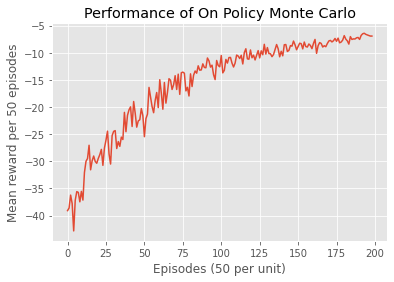

In [4]:
i = 0
averaged_rewards = []
while True:
  if i+50 == 10000:
    break
  averaged_rewards.append(np.mean(rewards_per_episode[i:i+50]))
  i += 50
# plotting rewards in the following plot
plt.plot(averaged_rewards)
plt.ylabel("Mean reward per 50 episodes")
plt.xlabel("Episodes (50 per unit)")
plt.title("Performance of On Policy Monte Carlo")
plt.show()

On policy monte carlo seems to be performing well as it converges to a minimum.
This seems to be the best performing algorithm as it considers the state importance after every episode. This is valuable as our formulation of the problem very well fits with On policy monte carlo methods.

## Off Policy Monte Carlo

In [38]:
MAX_STEPS = 50

In [39]:
# arbitrary initializations

off_q_mc = np.random.rand(14,14,4) * (0-9)
off_c_mc = np.random.rand(14,14,4)
off_policy_mc = np.argmax(off_q_mc, axis = 2)

test_episode_rewards = []
for episode in range(max_episodes):
  
  game.reset()
  episode_state_actions = []
  episode_rewards = []
  current_state = game.obs

  ## generate an episode
  for step in range(MAX_STEPS):

    chosen_action = np.random.choice(4, 1, p = on_policy_mc[game.obs[0], game.obs[1], :])
    next_state, reward, terminated, _ = game.step(action_space[int(chosen_action[0])])
    
    episode_state_actions.append([current_state.tolist(), chosen_action[0]])
    episode_rewards.append(reward)
    current_state = next_state

    if reward == 0:
      print("Goal Reached!") 
      break
    
    if terminated == 1:
      break

  T = len(episode_rewards)
  G = 0.
  W = 1

  for t in range(T - 1, -1, -1):
    G = gamma*G + episode_rewards[t]
    i1, i2, i3 = episode_state_actions[t][0][0], episode_state_actions[t][0][1], episode_state_actions[t][1] 
    off_c_mc[i1, i2, i3] += W 
    off_q_mc[i1, i2, i3] += (W/off_c_mc[i1, i2, i3])*(G - off_q_mc[i1, i2, i3])
    off_policy_mc[i1, i2] = np.argmax(off_q_mc[i1, i2, :])
    if i3 != off_policy_mc[i1, i2]:
      break
    W = W*(1/on_policy_mc[i1, i2, i3])

  test_reward = 0
  ## simply run this to compare performance
  for step in range(MAX_STEPS):

    chosen_action = off_policy_mc[game.obs[0], game.obs[1]] if np.random.choice(2, p = [0.9, 0.1]) else np.random.choice(4)
    next_state, reward, terminated, _ = game.step(action_space[int(chosen_action)])
    test_reward += reward
    if reward == 0:
      print("Goal Reached!")
      break
    if terminated:
      break
  
  test_episode_rewards.append(test_reward)

Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal Reached!
Goal R

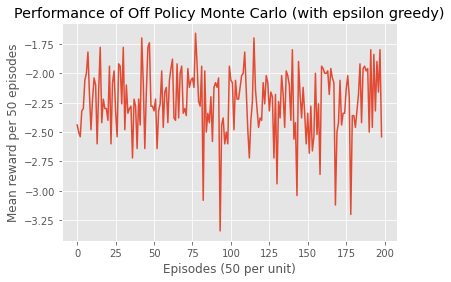

In [41]:
i = 0
averaged_rewards = []
while True:
  if i+50 == 10000:
    break
  averaged_rewards.append(np.mean(test_episode_rewards[i:i+50]))
  i += 50
# plotting rewards in the following plot
plt.plot(averaged_rewards)
plt.ylabel("Mean reward per 50 episodes")
plt.xlabel("Episodes (50 per unit)")
plt.title("Performance of Off Policy Monte Carlo (with epsilon greedy)")
plt.show()

Off policy also performs well as the soft policy it follows was the previous policy.

## SARSA

In [55]:
def epsilon_greedy_action(p = [], eps_val = greedy_epsilon):
  is_greedy = np.random.choice(2, p = [greedy_epsilon, 1-greedy_epsilon])
  if is_greedy:
    return np.argmax(p)
  else:
    return np.random.choice(4, 1, p = [0.25, 0.25, 0.25, 0.25])[0]

In [56]:
MAX_STEPS = 400
sarsa_eps = 0.99
step_size = 0.01
q_sarsa = np.random.rand(14,14,4)
q_sarsa[3,2,:] = 0
sarsa_rewards = []

for episode in range(max_episodes):
  sarsa_eps = max(sarsa_eps*0.999, 0.2)
  current_state = game.reset()
  current_action = epsilon_greedy_action(p = q_sarsa[current_state[0], current_state[1],:])
  episode_reward = 0
  
  for step in range(MAX_STEPS):
    next_state, reward, terminated, _ = game.step(current_action)
    next_action = epsilon_greedy_action(p = q_sarsa[next_state[0], next_state[1],:])
    q_sarsa[current_state[0], current_state[1], current_action] += step_size*(reward + gamma*q_sarsa[next_state[0], next_state[1], next_action] - q_sarsa[current_state[0], current_state[1], current_action])
    current_action = next_action
    current_state = next_state
    episode_reward += reward

    if terminated:
      break

  sarsa_rewards.append(episode_reward)

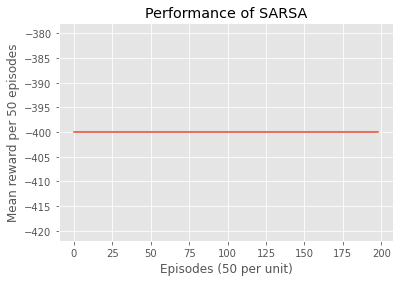

In [57]:
i = 0
averaged_rewards = []

while True:
  if i+50 == 10000:
    break
  averaged_rewards.append(np.mean(sarsa_rewards[i:i+50]))
  i += 50

# plotting rewards in the following plot
plt.plot(averaged_rewards)
plt.ylabel("Mean reward per 50 episodes")
plt.xlabel("Episodes (50 per unit)")
plt.title("Performance of SARSA")
plt.show()

SARSA never seems to converge

## Q Learning

In [48]:
greedy_epsilon = 0.999
min_epsilon = 0.1
max_episodes = 40000
MAX_STEPS = 50

In [49]:
step_size = 0.1
q_learning_rewards = []
q_q = np.random.rand(14,14,4)*(0-10)
q_q[3,2,:] = 0
decaying_greedy_epsilon = greedy_epsilon

for episode in range(max_episodes):

  current_state = game.reset()

  decaying_greedy_epsilon = max(min_epsilon, decaying_greedy_epsilon*0.999)

  episode_reward = 0

  for step in range(MAX_STEPS):

    current_action = epsilon_greedy_action(p = q_q[current_state[0], current_state[1],:], eps_val=decaying_greedy_epsilon)
    next_state, reward, terminated, _ = game.step(action_space[current_action])
    best_next_action = np.argmax(q_q[next_state[0], next_state[1], :])
    q_q[current_state[0], current_state[1], current_action] += step_size*(reward + gamma*q_q[next_state[0], next_state[1], best_next_action] - q_q[current_state[0], current_state[1], current_action])
    current_state = next_state
    episode_reward += reward

    if terminated:
      if reward == 0:
        print("Objective Completed!")
      break

  q_learning_rewards.append(episode_reward)

Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Completed!
Objective Com

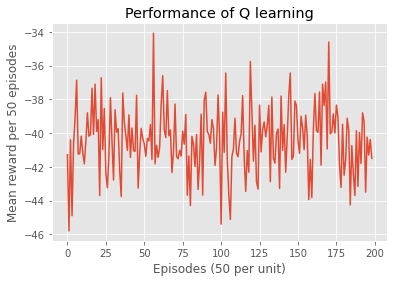

In [58]:
i = 0
averaged_rewards = []

while True:
  if i+50 == 10000:
    break
  averaged_rewards.append(np.mean(q_learning_rewards[i:i+50]))
  i += 50

# plotting rewards in the following plot
plt.plot(averaged_rewards)
plt.ylabel("Mean reward per 50 episodes")
plt.xlabel("Episodes (50 per unit)")
plt.title("Performance of Q learning")
plt.show()

Q learning doesn't seem to converge, as it is very noisy.

## Policy Gradient

In [60]:
# having 10 parameters for theta
policy_gradient_pi = np.random.rand(14,14,10)
step_size = 0.01
theta = np.random.rand(10)

for episode in range(max_episodes):
  
  for step in range(MAX_STEPS):

    current_action = epsilon_greedy_action(p = policy_gradient_pi[current_state[0], current_state[1],theta], eps_val=decaying_greedy_epsilon)
    next_state, reward, terminated, _ = game.step(action_space[current_action])
    G += reward
    theta = theta + step_size*gamma*np.ln(policy_gradient_pi[current_state[0], current_state[1], theta])
    if terminated:
      if reward == 0:
        print("Objective Completed!")
      break